## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, metrics
from sklearn import model_selection
from sklearn import linear_model, tree, ensemble, neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
plt.style.use('ggplot')
%matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [70]:
#plt.rcParams["figure.figsize"] = [10,5]

## Executive Summary

## Problem Statement

Using the responses gathered from married individuals, we will build a model to predict whether or not an individual will commit extramarital affair based on his/her profile. We will also try to find traits prevalent in individuals committing extramarital affair

## Dataset

In [3]:
sm.datasets

<module 'statsmodels.datasets' from 'C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\datasets\__init__.pyc'>

In [4]:
affair=sm.datasets.fair.load()

In [5]:
affair.data

rec.array([( 3.,  32.,   9. ,  3.,  3.,  17.,  2.,  5.,  0.1111111),
           ( 3.,  27.,  13. ,  3.,  1.,  14.,  3.,  4.,  3.2307692),
           ( 4.,  22.,   2.5,  0.,  1.,  16.,  3.,  5.,  1.3999996), ...,
           ( 5.,  22.,   2.5,  0.,  2.,  14.,  3.,  1.,  0.       ),
           ( 5.,  32.,   6. ,  1.,  3.,  14.,  3.,  4.,  0.       ),
           ( 4.,  22.,   2.5,  0.,  2.,  16.,  2.,  4.,  0.       )], 
          dtype=[('rate_marriage', '<f8'), ('age', '<f8'), ('yrs_married', '<f8'), ('children', '<f8'), ('religious', '<f8'), ('educ', '<f8'), ('occupation', '<f8'), ('occupation_husb', '<f8'), ('affairs', '<f8')])

In [6]:
df=pd.DataFrame(affair.data)

Dataset is obtained from Statsmodel dataset<br>
It contains responses on marriage happiness and extramarital affair survey published in Yale Journal of Political Economy.<br>
Survey conducted on female only

Dictionary for dataset is as follows:

**Column**|**Type**|**Description**|**Key**
:-----:|:-----:|:-----:|:-----:
rate_marriage|Integer|How happy is the marriage|1=very poor, 2=poor, 3=fair, 4=good, 5=very good
age|Integer|Age|
yrs_married|Integer|No. years married. Interval approximations|
children|Integer|Number of children|
religious|Integer|How religious|1 = not, 2 = mildly, 3 = fairly, 4 = strongly
educ|Integer|Level of education|9=grade school, 12 = high school, 14=some college, 16=college graduate, 17=some graduate school, 20 = advanced degree
occupation|Integer|Occupation|1 = student, 2 = farming, agriculture; semi-skilled, or unskilled worker; 3 = white-colloar; 4 = teacher counselor social worker, nurse; artist, writers; technician, skilled worker, 5 = managerial, administrative, business, 6 = professional with advanced degree
occupation_husb|Integer|Husband's Occupation|1 = student, 2 = farming, agriculture; semi-skilled, or unskilled worker; 3 = white-colloar; 4 = teacher counselor social worker, nurse; artist, writers; technician, skilled worker, 5 = managerial, administrative, business, 6 = professional with advanced degree
affairs|Integer|Measure of time spent in extramarital affair|Shown as a fraction of 1

## Risk and Assumptions

 - Assumptions:
 >  - Data is accurately recorded
 >  - Respondents are honest
 
 - Risks:
 >  - Respondent is not representative of the society
 >  - inaccurate response

## Hypothesis

Null hypothesis, $H_0$: There is no relationship between a person's marriage happiness and his/her tendency of having extramarital affair <br>
Alternative hypothesis, $H_1$: Married individuals who are not happy with their marriage have higher tendency of committing extramarital affair

## Success Metrics

Ability to predict probability of extramarital affair given a profile

## Exploratory Data Analysis

In [7]:
df.shape

(6366, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [9]:
# convert some of the fields to int to allow get dummies naming without decimal
df['rate_marriage']=df.rate_marriage.astype(int)
df['occupation']=df.occupation.astype(int)
df['occupation_husb']=df.occupation_husb.astype(int)
df['religious']=df.religious.astype(int)

There is no missing value in dataset

In [10]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32.0,9.0,3.0,3,17.0,2,5,0.111111
1,3,27.0,13.0,3.0,1,14.0,3,4,3.230769
2,4,22.0,2.5,0.0,1,16.0,3,5,1.400000
3,4,37.0,16.5,4.0,3,16.0,5,5,0.727273
4,5,27.0,9.0,1.0,1,14.0,3,4,4.666666


In [11]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


## Convert Children and Affairs to Binary 

In [12]:
# Converting children and affair to yes (1) and no (0)
df2=df.copy()
df2['affairs_group'] = 0
df2['affairs_group'][df2['affairs']>0]=1
df2['affairs_group'][df2['affairs']<=0]=0
df2['child_group']=0
df2['child_group'][df2['children']<=0]=0
df2['child_group'][df2['children']>0]=1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A 

In [13]:
df2.drop(['children','affairs'], axis=1, inplace=True)
df2.corr()

,rate_marriage,age,yrs_married,religious,educ,occupation,occupation_husb,affairs_group,child_group
rate_marriage,1.000000,-0.111127,-0.128978,0.078794,0.079869,0.039528,0.027745,-0.331776,-0.168831
age,-0.111127,1.000000,0.894082,0.136598,0.027960,0.106127,0.162567,0.146519,0.520677
yrs_married,-0.128978,0.894082,1.000000,0.132683,-0.109058,0.041782,0.128135,0.203109,0.613814
religious,0.078794,0.136598,0.132683,1.000000,0.032245,0.035746,0.004061,-0.129299,0.096127
educ,0.079869,0.027960,-0.109058,0.032245,1.000000,0.382286,0.183932,-0.075280,-0.134299
occupation,0.039528,0.106127,0.041782,0.035746,0.382286,1.000000,0.201156,0.028981,-0.025478
occupation_husb,0.027745,0.162567,0.128135,0.004061,0.183932,0.201156,1.000000,0.017637,0.073403
affairs_group,-0.331776,0.146519,0.203109,-0.129299,-0.075280,0.028981,0.017637,1.000000,0.191515
child_group,-0.168831,0.520677,0.613814,0.096127,-0.134299,-0.025478,0.073403,0.191515,1.000000


In [14]:
pd.crosstab(df2['child_group'], df2['affairs_group'])

affairs_group,0,1
child_group,,
0,1912,502
1,2401,1551


## Visualization

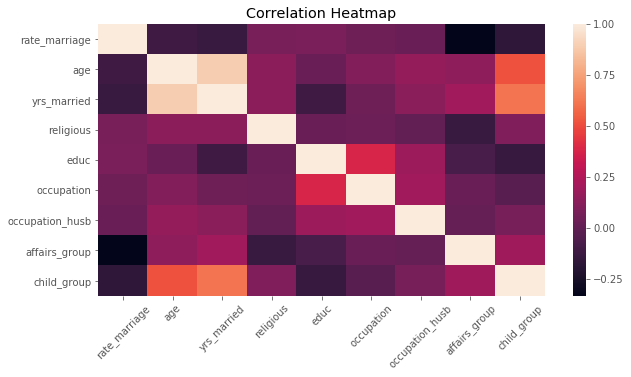

In [15]:
sns.heatmap(df2.corr())
plt.title('Correlation Heatmap')
plt.xticks(rotation='45')
plt.show()

In [16]:
df2.corr()[['affairs_group']].abs().sort_values(by='affairs_group',ascending=False)

,affairs_group
affairs_group,1.000000
rate_marriage,0.331776
yrs_married,0.203109
child_group,0.191515
age,0.146519
religious,0.129299
educ,0.075280
occupation,0.028981
occupation_husb,0.017637


In [17]:
df2.corr()[['affairs_group']].sort_values(by='affairs_group',ascending=False)

,affairs_group
affairs_group,1.000000
yrs_married,0.203109
child_group,0.191515
age,0.146519
occupation,0.028981
occupation_husb,0.017637
educ,-0.075280
religious,-0.129299
rate_marriage,-0.331776


Negative correlation between religious, rate_marriage and affairs_group. Positive correlation between yrs_married, child_group, age and affairs_group

#### Boxplot showing religious level and amount of time spent for affair

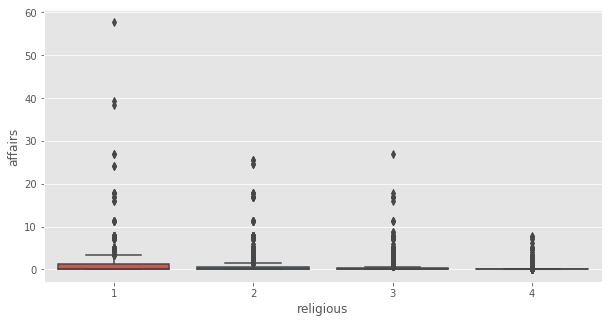

In [18]:
sns.boxplot(x='religious',y='affairs',data=df)
plt.show()

Generally more longer time spent on affair among individual with low religious values

#### Distribution of number of affairs

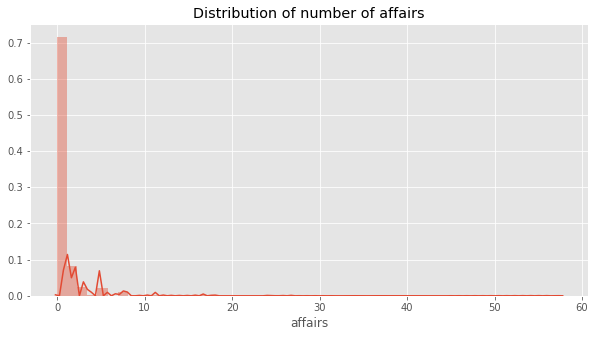

In [19]:
sns.distplot(df['affairs'])
plt.title('Distribution of number of affairs')
plt.show()

Most of the female surveyed does not commit any affair

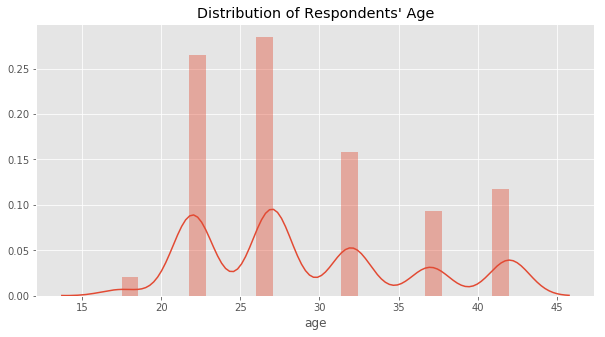

In [20]:
plt.figure(figsize = (10,5))
sns.distplot(df['age'])
plt.title("Distribution of Respondents' Age")
plt.show()

In [21]:
df.age.value_counts()

27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64

The age of respondents are grouped into upper half and lower half of each decade, .e.g early 20s = 22, later 20s = 27. Suspect this data has been aggregated

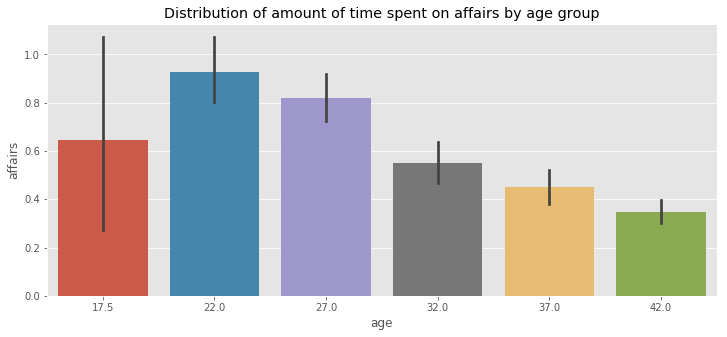

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x='age', y='affairs',data=df)
plt.title("Distribution of amount of time spent on affairs by age group")
plt.show()


Higher amount of time spent on affairs by those in early 20s

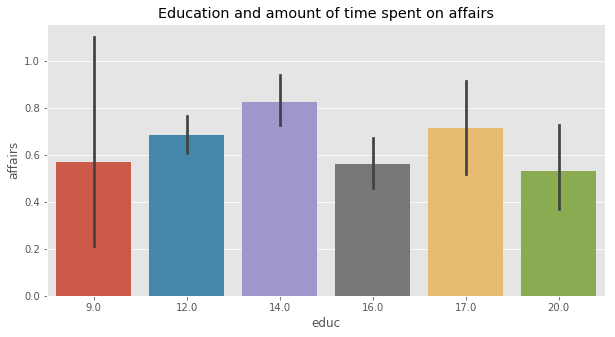

In [23]:
sns.barplot(x='educ', y='affairs',data=df)
plt.title('Education and amount of time spent on affairs')
plt.show()

Inconclusive correlation between education and amount of time spent on affair

In [24]:
pd.crosstab(index=df['rate_marriage'],columns=df['age'])

age,17.5,22.0,27.0,32.0,37.0,42.0
rate_marriage,,,,,,
1,1,10,19,22,16,31
2,6,81,89,67,48,57
3,14,225,316,174,117,147
4,45,637,712,380,229,239
5,73,847,795,426,224,319


In [25]:
df.affairs.value_counts().head()

0.000000    4313
1.400000     118
0.583333      86
0.400000      72
1.333333      72
Name: affairs, dtype: int64

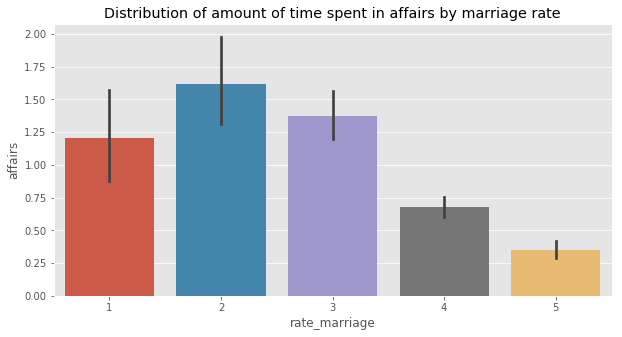

In [26]:
sns.barplot(x='rate_marriage', y='affairs',data=df)
plt.title("Distribution of amount of time spent in affairs by marriage rate")
plt.show()

It seems there is strong negative correlation between marriage happiness and amount of time spent on affairs

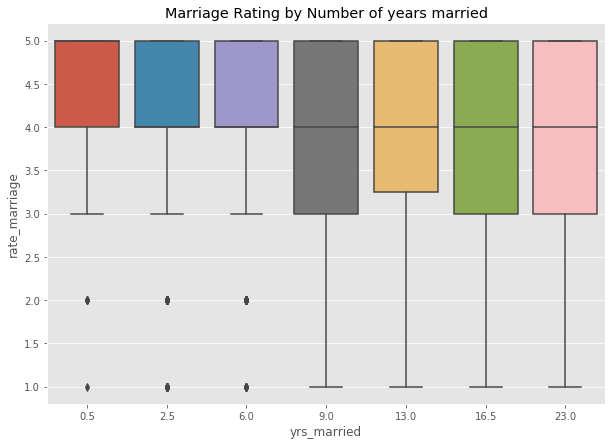

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(y='rate_marriage', x='yrs_married',data=df2)
plt.title("Marriage Rating by Number of years married")
plt.show()

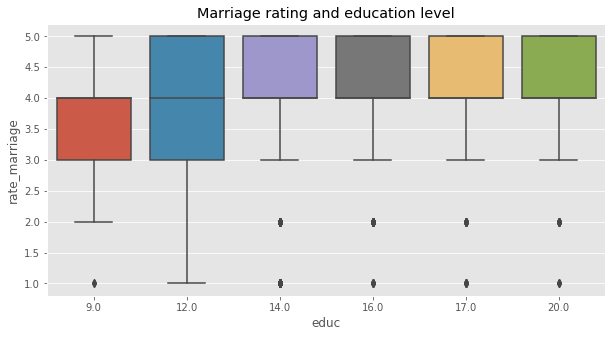

In [33]:
sns.boxplot(x='educ', y='rate_marriage', data = df2)
plt.title('Marriage rating and education level')
plt.show()

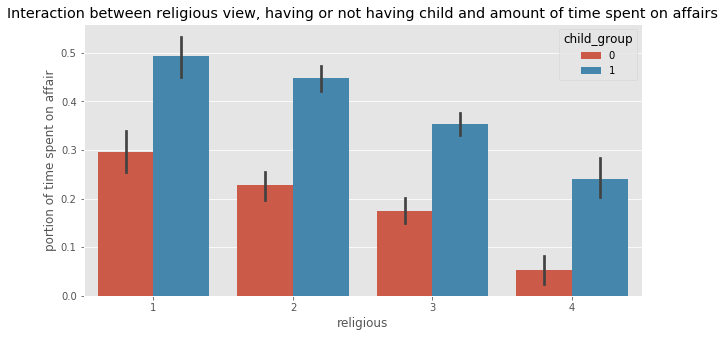

In [30]:
sns.barplot(y='affairs_group', x='religious',hue='child_group',data=df2)
plt.title('Interaction between religious view, having or not having child and amount of time spent on affairs')
plt.ylabel('portion of time spent on affair')
plt.show()

Negative correlation between Religious level and amount of time spent on affairs

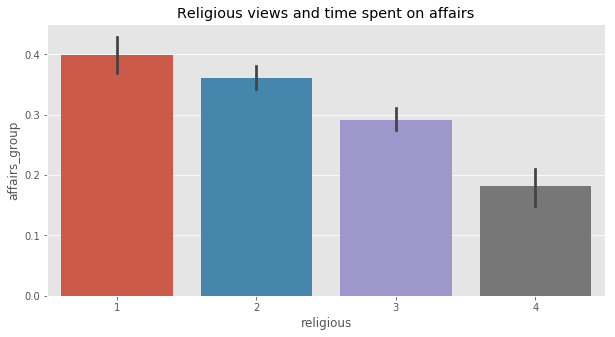

In [31]:
sns.barplot(x='religious', y='affairs_group',data=df2)
plt.title('Religious views and time spent on affairs')
plt.show()

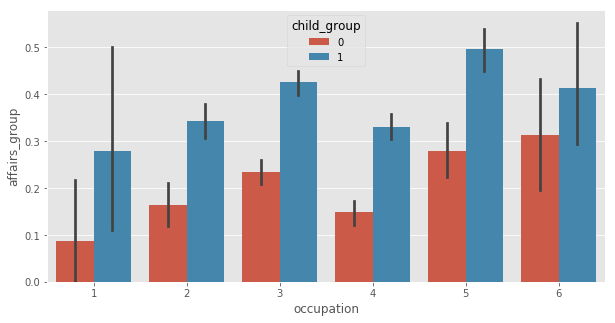

In [32]:
sns.barplot(x='occupation', y='affairs_group', hue='child_group', data=df2)
plt.show()

Professionals with advanced degree spend more time on affairs?

## Get Dummies

In [ ]:
df3=pd.get_dummies(df2, columns=['rate_marriage', 'religious', 'occupation'], drop_first=True)
df3.head()

In [ ]:
df3.info()

In [ ]:
sns.heatmap(df3.corr()[['affairs_group']])
plt.title('Correlation between probability of affair and marriage rating')
plt.show()

In [ ]:
df3.corr()[['affairs_group']]

### Define X and y

In [35]:
a = df2.iloc[:,:6]

In [36]:
b = df2.iloc[:,8:]

In [37]:
c = a.join(b)

In [38]:
factors = c.columns
factors

Index([u'rate_marriage', u'age', u'yrs_married', u'religious', u'educ',
       u'occupation', u'child_group'],
      dtype='object')

In [39]:
#factors=['rate_marriage','age','yrs_married', 'child_group', 'religious','educ','occupation']
#factors=df3.columns[7:]
#factors.append(df3.columns[7:])
#print factors

In [40]:
X=df2[factors]
y=df2['affairs_group']

In [41]:
type(X)

pandas.core.frame.DataFrame

#### KNN model with 5 neighbors

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [43]:
knn=KNeighborsClassifier(5).fit(X_train,y_train)
test_preds=knn.predict(X_test)
print ('KNN model Accuracy: {} '.format(metrics.accuracy_score(test_preds,y_test)))

KNN model Accuracy: 0.697864321608 


In [44]:
metrics.confusion_matrix(y_test, test_preds)

array([[904, 191],
       [290, 207]])

#### KNN with Cross Validation:

In [45]:
Xkf=np.array(df2[factors])

In [46]:
kf=KFold(n_splits=10, random_state=10, shuffle=True)
scores=[]
for train_index, test_index in kf.split(Xkf,y):
    X_trainkf=Xkf[train_index]
    X_testkf=Xkf[test_index]
    y_trainkf=y[train_index]
    y_testkf=y[test_index]
    knn=KNeighborsClassifier(5).fit(X_trainkf,y_trainkf)
    test_preds=knn.predict(X_testkf)
    accuracy=metrics.accuracy_score(test_preds,y_testkf)
    scores.append(accuracy)
print ('KNN with KFold Mean Accuracy: {}'.format( np.mean(scores)))

KNN with KFold Mean Accuracy: 0.69589022837


#### Logistic Regression

In [47]:
lr=linear_model.LogisticRegressionCV(cv=5)
lr.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [48]:
predicted=lr.predict(X_test)
accuracy=metrics.accuracy_score(predicted, y_test)
print 'Logistic Regression Accuracy: ', accuracy

Logistic Regression Accuracy:  0.732412060302


In [49]:
odds=np.exp(lr.coef_[0])
odds

array([ 0.50006497,  0.94122887,  1.10546047,  0.6686985 ,  0.96715315,
        1.22912308,  1.3890972 ])

In [52]:
pd.DataFrame([X_train.columns, odds], index=['Factors', 'Coef']).T.sort_values(by='Coef', ascending=False)

,Factors,Coef
6,child_group,1.3891
5,occupation,1.22912
2,yrs_married,1.10546
4,educ,0.967153
1,age,0.941229
3,religious,0.668699
0,rate_marriage,0.500065


#### Decision Tree Model

In [61]:
dt=tree.DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=10, splitter='best')

In [62]:
#accuracy
dt_pred=dt.predict(X_test)
dtaccuracy=metrics.accuracy_score(y_test,dt_pred)
print ('Decision Tree Accuracy: {}'.format(dtaccuracy))

Decision Tree Accuracy: 0.68027638191


In [64]:
pd.DataFrame([X_train.columns, dt.feature_importances_],index=['Feature', 'Importance']).T.sort_values(by='Importance',ascending=False)

,Feature,Importance
0,rate_marriage,0.197853
2,yrs_married,0.193478
4,educ,0.187594
1,age,0.139435
5,occupation,0.122914
3,religious,0.103071
6,child_group,0.0556559


#### Random Forest model

In [65]:
rf=ensemble.RandomForestClassifier()
rfmodel=rf.fit(X_train, y_train)
y_pred=rfmodel.predict(X_test)

In [66]:
rfmodelacc=metrics.accuracy_score(y_test,y_pred)
print ('Random Forest accuracy: {}'.format(rfmodelacc))

Random Forest accuracy: 0.686557788945


In [67]:
pd.DataFrame([X_train.columns, rfmodel.feature_importances_],index=['Feature','Importance']).T.sort_values(by="Importance",ascending=False)

,Feature,Importance
0,rate_marriage,0.207139
4,educ,0.177696
5,occupation,0.167595
2,yrs_married,0.164381
1,age,0.123063
3,religious,0.120909
6,child_group,0.0392168


In [68]:
def plot_roc(name, ytest,y_score):
    fpr,tpr,treshold=metrics.roc_curve(ytest,y_score)
    plt.plot(fpr,tpr,label='ROC curve of {}'.format(name,metrics.roc_auc_score(ytest,y_score)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve of models')

def fit_model(model,xtrain,ytrain):
    model.fit(xtrain,ytrain)
    return model

def eval_model(model, name, xtrain=X_train, xtest=X_test,ytrain=y_train,ytest=y_test):
    model = fit_model(model, xtrain, ytrain)
    y_pred=model.predict(xtest)
    y_score=model.predict_proba(xtest)[:,1]
    plot_roc(name, ytest, y_score)
    plt.legend()

    print '************************************************'
    print ("Accuracy of {} model: {}".format(name, metrics.accuracy_score(ytest,y_pred)))
    print ('Classification report for {} model'.format(name))
    print(metrics.classification_report(y_test,y_pred,target_names=['Not_having_affair', 'Having_affair']))
    
    print ('Confusion matrix for {} model'.format(name))
    confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
    confusion_matrix=pd.DataFrame(confusion_matrix, index=['Not_having_affair', 'Having_affair'], columns=['Not_having_affair', 'Having_affair'])
    print confusion_matrix
    print ''
    print ''

************************************************
Accuracy of KNN model: 0.697864321608
Classification report for KNN model
                   precision    recall  f1-score   support

Not_having_affair       0.76      0.83      0.79      1095
    Having_affair       0.52      0.42      0.46       497

      avg / total       0.68      0.70      0.69      1592

Confusion matrix for KNN model
                   Not_having_affair  Having_affair
Not_having_affair                904            191
Having_affair                    290            207


************************************************
Accuracy of Logistic_Regression model: 0.732412060302
Classification report for Logistic_Regression model
                   precision    recall  f1-score   support

Not_having_affair       0.76      0.89      0.82      1095
    Having_affair       0.61      0.39      0.47       497

      avg / total       0.72      0.73      0.71      1592

Confusion matrix for Logistic_Regression model
        

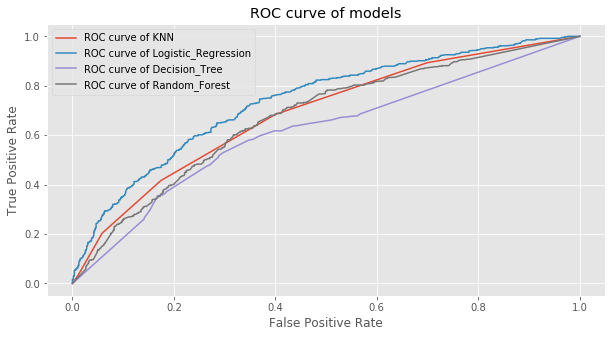

In [71]:
#KNN Model
eval_model(neighbors.KNeighborsClassifier(),'KNN')
#Logistic Regression model
eval_model(linear_model.LogisticRegressionCV(cv=5), 'Logistic_Regression')
#Decision Tree model
eval_model(tree.DecisionTreeClassifier(),'Decision_Tree')
#Random Forest
eval_model(ensemble.RandomForestClassifier(),'Random_Forest')

Highest area under curve (AUC) is for Logistic Regression.

### Assess each factor's contribution to the occurrence of affair

In [ ]:
#logistics Regression's coefficient
odds=np.exp(lr.coef_[0])
odds

In [ ]:
pd.DataFrame([X_train.columns, odds], index=['Feature','Coef']).T.sort_values(by="Coef",ascending=False)

In [ ]:
#Decision Tree
dtree=tree.DecisionTreeClassifier()
dtmodel=dtree.fit(X_train,y_train)
dtmodel.feature_importances_

In [ ]:
dtmodel.feature_importances_

In [ ]:
pd.DataFrame([X_train.columns, dtmodel.feature_importances_]),index=(['Feature','Importance'])

In [ ]:
#Random Forest
rf=ensemble.RandomForestClassifier()
rfmodel=rf.fit(X_train, y_train)

In [ ]:
pd.DataFrame([X_train.columns,rfmodel.feature_importances_]),index=(['Feature','Importance'])

## Findings